# Hierarchical modeling

As we have covered in this morning's lecture, hierarchical models are one of the most attractive applications of Statistical Learning. We are first going to check a very complete example on how to predict the exposure to Radon in Americal households. Try then to solve some exercises yourself.

To begin with, check the this notebook: https://docs.pymc.io/notebooks/multilevel_modeling.html, if you want to try it out, this github repo https://github.com/fonnesbeck/multilevel_modeling hosts both the code and the data.


You can now try to solve the following problems. I have got the exercises and data from the practical from http://www.bias-project.org.uk/WB2011Man/BHM-2011-practical.pdf. 




## Mortality rates

In this question, you will be modelling data on mortality rates following surgery in each of 12
hospitals. The data file surgical-dat.txt contains the following columns: hospital_code, alphanumerical code for the hospital, surgeries, the number of operations carried out in each hospital in a 1 year period, deaths, the
number of deaths within 30 days of surgery in each hospital.

The aim of the analysis is to use surgical mortality rates as an indicator of each hospital’s
performance and to identify whether any hospitals appear to be performing unusually well or
poorly.

In [2]:
import pandas as pd
import pymc3 as pm
import numpy as np
import seaborn as sns
# Open the table

with open('surgical-dat.txt', 'r') as f:
    data = pd.read_csv(f)

data

,hospital_code,surgeries,deaths
0,HC1,47,0
1,HC30,148,18
2,HC20,119,8
3,HC19,810,46
4,HC2,211,8
5,HC39,196,13
6,HC15,148,9
7,HC22,215,31
8,HC4,207,14
9,HC5,97,8


In [11]:
# Build the model 

with pm.Model() as model:
    
    a = pm.Gamma('a',alpha=1,beta=1)
    b = pm.Gamma('b',alpha=1,beta=1)

    p = pm.Deterministic('p', a/(a+b))
    
    theta = pm.Beta('theta', alpha=a, beta=b, shape=len(data))

    obs = pm.Binomial('obs', p=theta, observed=data['deaths'].values, n=data['surgeries'].values)
    
    trace = pm.sample(1000, tune=2000, target_accept=0.95)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [theta, b, a]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:07<00:00, 779.06draws/s] 
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9815255828>,
      dtype=object)

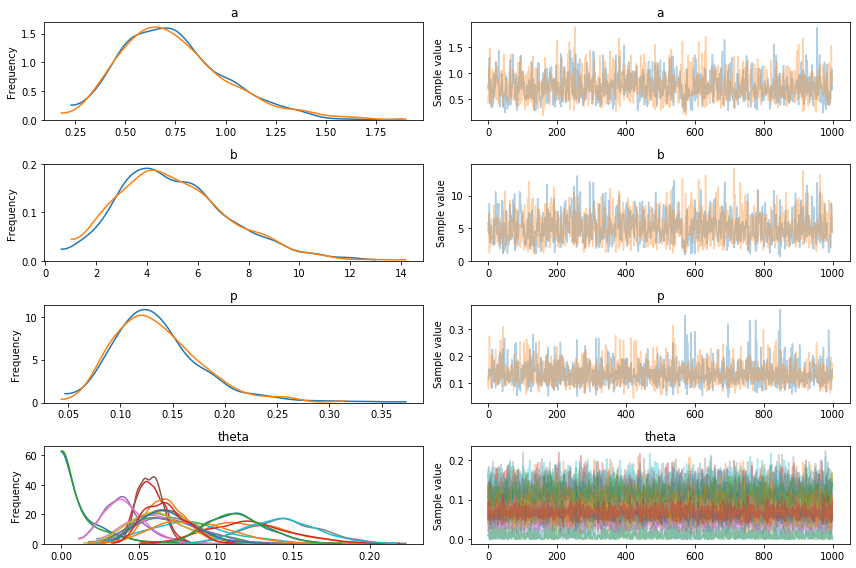

In [12]:
pm.traceplot(trace)

## Patient treatment

This example uses (simulated) data from a clinical trial comparing two alternative treatments
for HIV-infected individuals. 80 patients with HIV infection were randomly assigned to one of
2 treatment groups (drug = 0 (didanosine, ddI) and drug = 1 (zalcitabine, ddC)). CD4 counts
were recorded at study entry (time t = 0) and again at 2, 6 and 12 months. An indicator of
whether the patient had already been diagnosed with AIDS at study entry was also recorded
(AIDS = 1 if patient diagnosed with AIDS, and 0 otherwise).

In [18]:
with open('cd4-dat.csv','r') as f:
    cd4=pd.read_csv(f)

cd4.head()

,CD4_1,CD4_2,CD4_3,CD4_4,drug,AIDS
0,4.861,5.074,4.522,4.2110,0,1
1,8.390,7.577,7.644,7.8710,1,0
2,5.020,5.329,4.620,4.2840,1,1
3,1.669,1.934,1.781,0.9785,0,1
4,5.875,5.499,5.475,5.6970,1,1


In [ ]:
# Run the model and monitor the slope and intercept parameters, the regression
# coefficients for the effects of treatment and AIDS, and the residual error variance.

# HINT: Use the unpooled estimator with a GLM

In [ ]:
# Modify your code for the previous model to include a random intercept and a random
# slope (i.e. time coefficient) for each patient. Treat the coefficients for the effects of drug
# treatment and AIDS as fixed (i.e. not random effects) as before.